# Bike Sharing Dataset on UCI Machine Learning Repository

## Overview
The Bike Sharing Dataset was donated to the UCI Machine Learning Repository by researcher Hadi Fanaee-T. It contains both hourly and daily counts of rental bikes between the years 2011 and 2012 in the Capital Bikeshare system, along with corresponding weather and seasonal information.

## Variable Information
The dataset includes various fields:
- `dteday`: Date
- `season`: Season
- `yr`: Year
- `mnth`: Month
- `hr`: Hour (only in hourly data)
- `holiday`: Whether the day is a holiday or not
- `weekday`: Day of the week
- `workingday`: Whether the day is a working day or not
- `weathersit`: Weather situation
- `temp`: Normalized temperature in Celsius
- `atemp`: Normalized feeling temperature in Celsius
- `hum`: Normalized humidity
- `windspeed`: Normalized wind speed
- `casual`: Count of casual users
- `registered`: Count of registered users
- `cnt`: Total count of rental bikes (casual + registered)

## Download Link
You can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset).

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## Exploring DataFrame

In [13]:
bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


`All columns have 731 non-null counts, confirming that there are no missing values in the dataset.`

## Total bike rentals

#### Convert 'dteday' column to datetime format & Plot the graph

In [15]:
bike_sharing["dteday"] = pd.to_datetime(bike_sharing["dteday"])

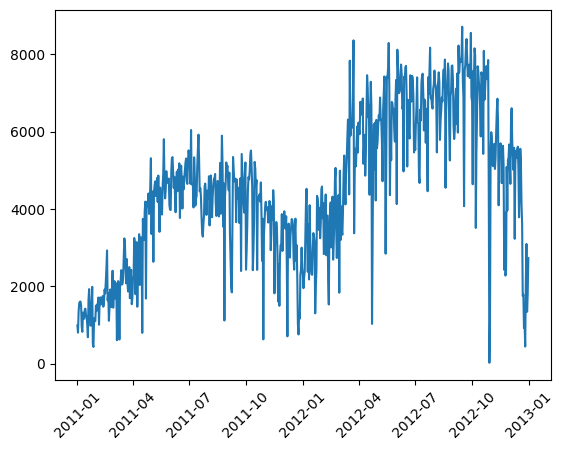

In [16]:
plt.plot(bike_sharing["dteday"], bike_sharing["cnt"])
plt.xticks(rotation=45)
plt.show()

## Bikes Rented: Casual Vs. Registered

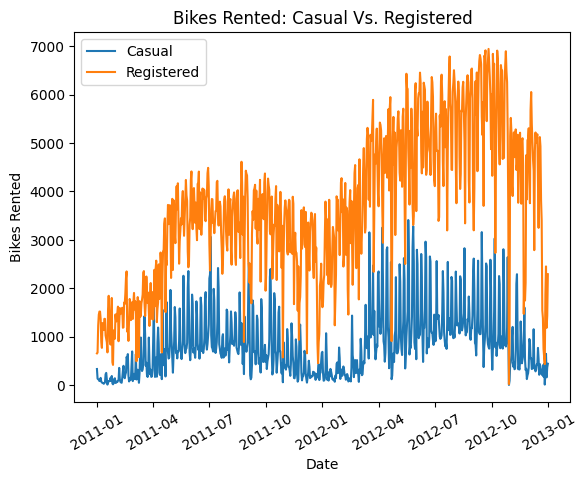

In [17]:
plt.plot(bike_sharing["dteday"], bike_sharing["casual"], label="Casual")
plt.plot(bike_sharing["dteday"], bike_sharing["registered"], label="Registered")
plt.legend()

# Add title and axis labels to the plot
plt.title("Bikes Rented: Casual Vs. Registered")
plt.xlabel("Date")
plt.ylabel("Bikes Rented")
plt.xticks(rotation=30)

plt.show()

### Trends Over Time:
- It's evident that the number of bikes rented by registered users is consistently higher than that by casual users. The trends for both types of users seem to have similar patterns, indicating that external factors like weather or holidays might affect both groups similarly.

## Seasonal Trends

#### Normalizing the 'cnt' column & Plotting Temp Vs. Bikes Rented Over Time

In [18]:
bike_sharing["cnt_norm"] = (bike_sharing["cnt"] - bike_sharing["cnt"].min()) / (bike_sharing["cnt"].max() - bike_sharing["cnt"].min())

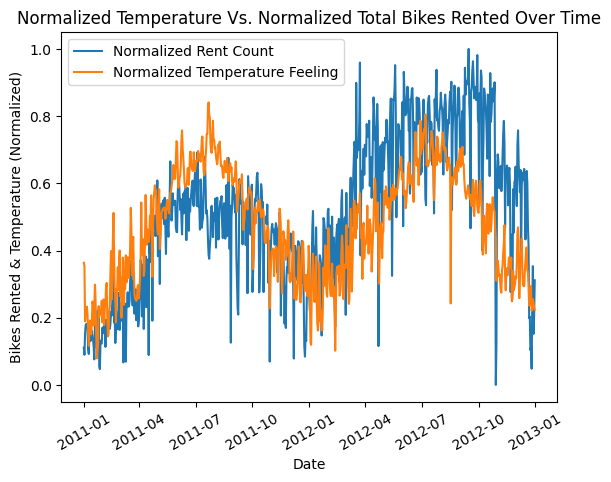

In [19]:
plt.plot(bike_sharing["dteday"], bike_sharing["cnt_norm"], label="Normalized Rent Count")
plt.plot(bike_sharing["dteday"], bike_sharing["atemp"], label="Normalized Temperature Feeling")
plt.legend()

# Add title and axis labels to the plot
plt.title("Normalized Temperature Vs. Normalized Total Bikes Rented Over Time")
plt.xlabel("Date")
plt.ylabel("Bikes Rented & Temperature (Normalized)")
plt.xticks(rotation=30)

plt.show()

In [20]:
bike_sharing["atemp"].corr(bike_sharing["cnt"])

0.6310656998491814

#### Windspeed Vs. Bikes Rented Over Time

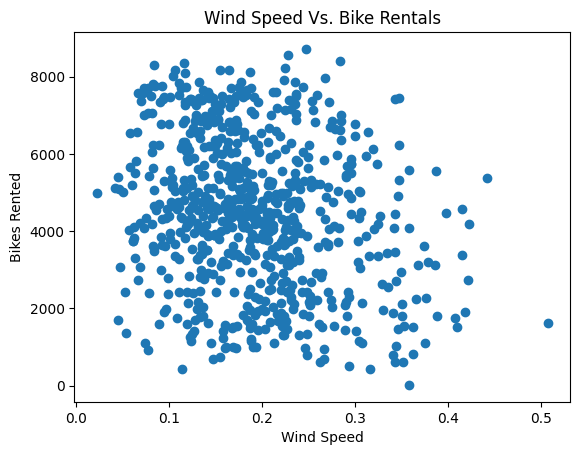

In [21]:
plt.scatter(bike_sharing["windspeed"], bike_sharing["cnt"])
plt.title("Wind Speed Vs. Bike Rentals")
plt.xlabel("Wind Speed")
plt.ylabel("Bikes Rented")
plt.show()

In [22]:
bike_sharing["windspeed"].corr(bike_sharing["cnt"])

-0.23454499742167004

### Seasonal Trends:
- The first graph seems to indicate a seasonal pattern, with both variables peaking and dipping at similar times.
- "Normalized Rent" seems to have slightly more volatility compared to "Normalized Temperature Feel". This could mean that while temperature is an important factor, other variables can also affect bike rentals.
- The second graph seems to indicate that as wind speeds increase, the number of bikes rented tends to decrease, although the relationship is not overwhelmingly strong.

## Patterns in Bike Rentals: A Comparative Analysis.



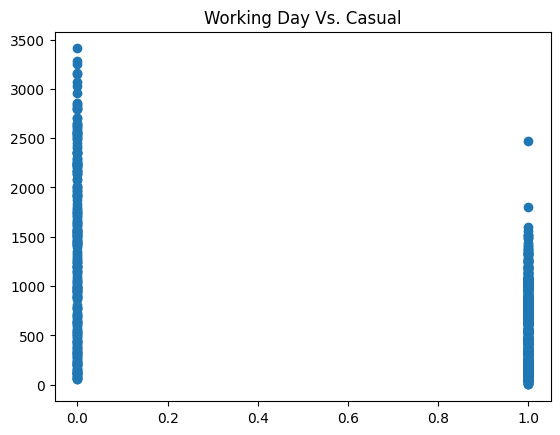

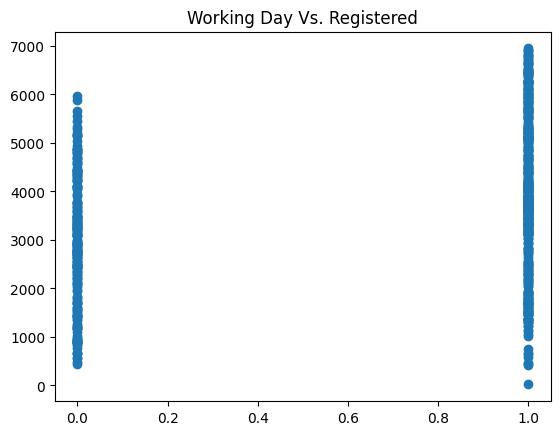

In [25]:
plt.scatter(bike_sharing["workingday"], bike_sharing["casual"])
plt.title("Working Day Vs. Casual")
plt.show()

plt.scatter(bike_sharing["workingday"], bike_sharing["registered"])
plt.title("Working Day Vs. Registered")
plt.show()

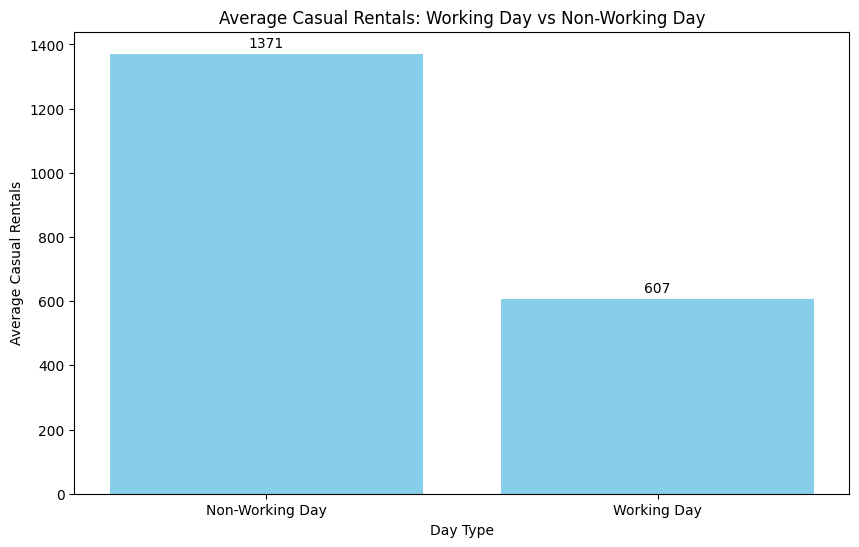

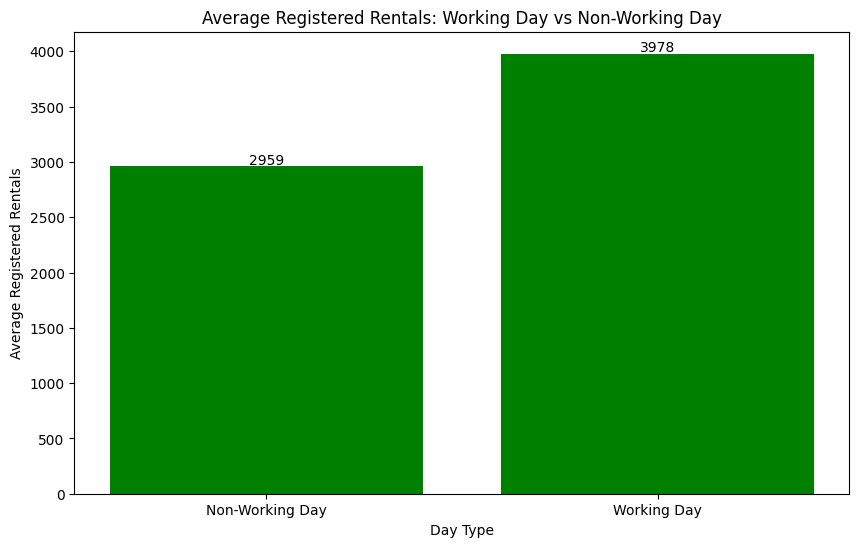

In [59]:
# Calculate the average rentals for casual and registered users based on working days
avg_rentals = bike_sharing.groupby("workingday")[["casual", "registered"]].mean()

working_days = ['Non-Working Day', 'Working Day']

# Plot the average casual rentals
plt.figure(figsize=(10, 6))
plt.bar(working_days, avg_rentals["casual"], color="skyblue")
plt.title('Average Casual Rentals: Working Day vs Non-Working Day')
plt.xlabel('Day Type')
plt.ylabel('Average Casual Rentals')

# Annotate bars with the actual values
for x, y in enumerate(avg_rentals["casual"]):
    plt.text(x, y + 20, str(round(y)), ha='center')
    
plt.show()

# Plot the average registered rentals
plt.figure(figsize=(10, 6))
plt.bar(working_days, avg_rentals["registered"], color="green")
plt.title('Average Registered Rentals: Working Day vs Non-Working Day')
plt.xlabel('Day Type')
plt.ylabel('Average Registered Rentals')

# Annotate bars with the actual values
for x, y in enumerate(avg_rentals["registered"]):
    plt.text(x, y + 20, str(round(y)), ha='center')

plt.show()

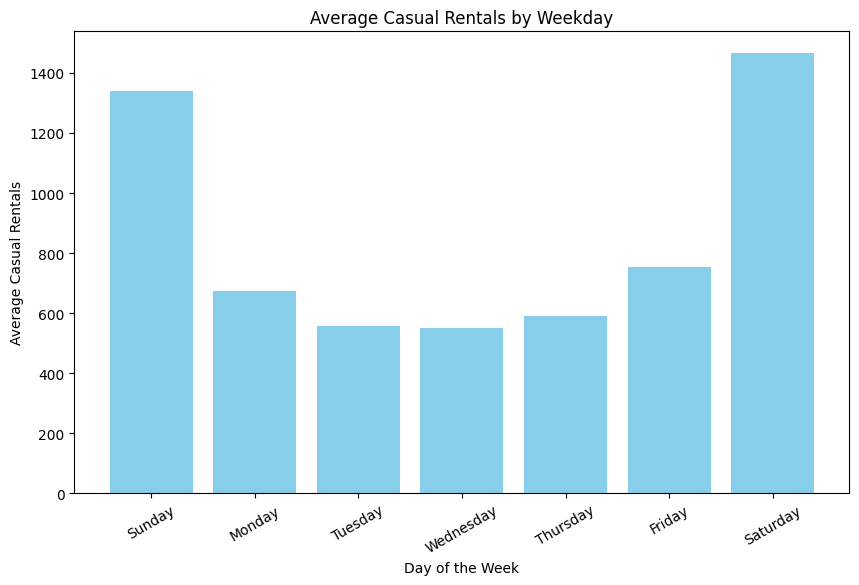

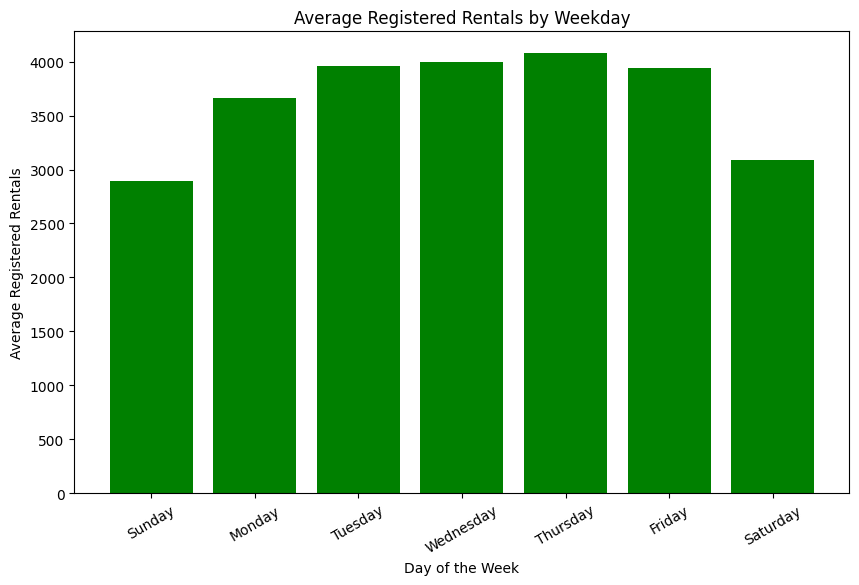

In [71]:
# Calculate the average rentals for casual and registered users based on weekdays
weekday_averages = bike_sharing.groupby('weekday')[['casual', 'registered']].mean()

# Define labels for the x-axis representing days of the week
days_of_the_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the average casual rentals for each weekday
plt.figure(figsize=(10, 6))
plt.bar(weekday_averages.index, weekday_averages['casual'], color="skyblue")
plt.title('Average Casual Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Casual Rentals')
plt.xticks(ticks=weekday_averages.index, labels=days_of_the_week, rotation=30)
plt.show()

# Plot the average registered rentals for each weekday
plt.figure(figsize=(10, 6))
plt.bar(weekday_averages.index, weekday_averages["registered"], color="green")
plt.title('Average Registered Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Registered Rentals')
plt.xticks(ticks=weekday_averages.index, labels=days_of_the_week, rotation=30)
plt.show()


### Observations and Analysis

#### Scatter Chart - Working Day Vs. Casual & Registered Rentals
- **Observation**: The scatter plot shows that casual rentals are significantly higher on non-working days compared to working days.
- **Interpretation**: This suggests that bike sharing is popular for free time activities or errands, which people prefer to run on their days off.

#### Bar Graph - Average Rentals on Working & Non-Working Days
- **Observation**: The bar graph supports the findings from the scatter plot, showing higher casual rentals on non-working days and higher registered rentals on working days.
- **Interpretation**: The higher number of registered rentals on working days suggests that bike sharing might be used for going to work or school.

#### Weekdays Bar Graph - Average Rentals by Day of the Week
- **Observation**: Casual rentals spike on the weekends (Saturday and Sunday), while registered rentals are fairly consistent on weekdays.
- **Interpretation**: This further supports the hypothesis that casual rentals are popular for free time activities, whereas registered rentals indicate more routine usage, likely for commuting.

#### Summary
The data suggests two main user behaviors:
1. **Casual Renters**: Likely to use the service for leisure activities, mainly on non-working days.
2. **Registered Renters**: Use the service more consistently, possibly for daily commuting.